# Визуализация данных с помощью библиотеки matplotlib

<img src="https://matplotlib.org/_static/logo2_compressed.svg"/>

Matplotlib - один из самых мощных инструментов визуализации данных.\
Эта библиотека включает множество различных методов визуализации данных,\
такие как 2D и 3D графики, гистограммы, круговые и столбцовые диаграммы, и многое другое.\
Все типы графиков обладают множеством возможностей конфигурирования.\
Как правило, Matplotlib используется в комплексе с другими инструментами\
для работы с данными, такими как Numpy, Pandas и OpenCV.\
\
Скачать код и ознакомиться с документацией вы можете на сайте [https://matplotlib.org/](https://matplotlib.org/)

Для возможности отображения графиков в ячейках Jupyter необходимо\
выполнить следующую инструкцию:

In [1]:
%matplotlib inline

Импорт модуля:

In [2]:
import matplotlib.pyplot as plt

Импортируем прочие необходимые для семинара библиотеки:

In [3]:
import sys
import os
import numpy as np
import random
import pandas as pd
import time

Будем использовать датасет Covid-19, доступный по адресу: [https://github.com/datasets/covid-19](https://github.com/datasets/covid-19)\
\
Необходимо выполнить следующие команды:
```
git clone https://github.com/datasets/covid-19 
cd covid-19
pip install -r scripts/requirements.txt
python scripts/process.py
```
При необходимости раскомментируйте и выполните код в следующей ячейке:

In [4]:
#!git clone https://github.com/datasets/covid-19
#!cd covid-19; git pull; pip3 install -r scripts/requirements.txt; python3 scripts/process.py

Загружаем данные из CSV-таблицы с помощью pandas:

In [5]:
aggr_data = pd.read_csv("./covid-19/data/countries-aggregated.csv")

Табличные данные содержат количество подтверждённых случаев\
заболевания Covid-19, выздоровевших и умерших для каждой страны\
на каждую дату, начиная с 22 января 2020 года

In [6]:
aggr_data.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


Получим данные заболеваемости по России

In [7]:
russia_data = aggr_data[aggr_data['Country'] == 'Russia'][["Date", "Confirmed"]]

Pandas имеет встроенные функции визуализации данных

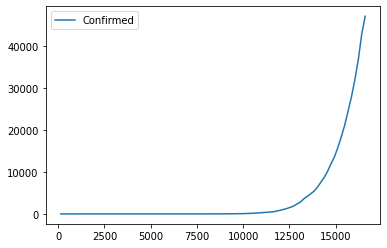

In [8]:
russia_data.plot()

Приведём данные в формат numpy и разделим их по столбцам

In [9]:
def get_nonzero_row(data, country, col_name):
    """Функция, помогающая извлечь все ненулевые данные
    заданного типа для заданной страны и соответствующие им даты
    """
    country_data = data[(data['Country'] == country) &
                        (data[col_name] > 0)]
    date = country_data["Date"].values
    
    dates_np = np.array([np.datetime64(d) for d in date])
    values_np = country_data[col_name].values
    return dates_np, values_np

Простой пример построения нескольких графиков.\
Построим три графика зависимости числа заболевших,\
выздоровевших и умерших от Covid-19 граждан России.\
\
Формат вызова функции построения графика: \
plt.plot(x, y, label, ...)\
\
plt.grid() - отобразить сетку

In [10]:
dates_confirmed, confirmed = get_nonzero_row(aggr_data, "Russia", "Confirmed")
dates_recovered, recovered = get_nonzero_row(aggr_data, "Russia", "Recovered")
dates_deaths, deaths = get_nonzero_row(aggr_data, "Russia", "Deaths")

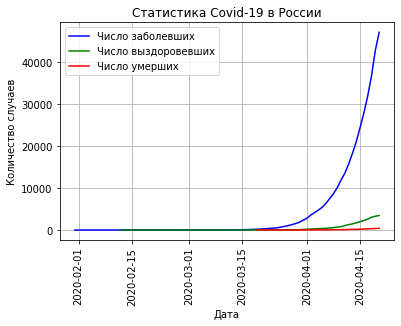

In [11]:
plt.plot(dates_confirmed, confirmed, label="Число заболевших", color="b")
plt.plot(dates_recovered, recovered, label="Число выздоровевших", color="g")
plt.plot(dates_deaths, deaths, label="Число умерших", color="#FF0000")
plt.grid() # Отобразим сетку
plt.xlabel("Дата") # Название оси X
plt.xticks(rotation=90) # Поворот значений по оси X
plt.ylabel("Количество случаев") # Название оси Y
plt.title("Статистика Covid-19 в России") # Название графика
plt.legend() # Отобразить легенду
plt.savefig("russia_stats.png") # Любой график можно сохранить в файл
plt.show()

Отобразим графики заболеваемости России, Китая и Италии.\
\
Для этого создадим объект контейнера графиков и три графика внутри него:\
fig - контейнер графиков\
ax - список из трёх вгрфиков\
\
ax.set_yscale("log") позволяет использовать логарифмическую шкалу по оси y\
ax.label_outer() позволяет спрятать надписи вдоль общей оси для всех графиков, кроме нижнего

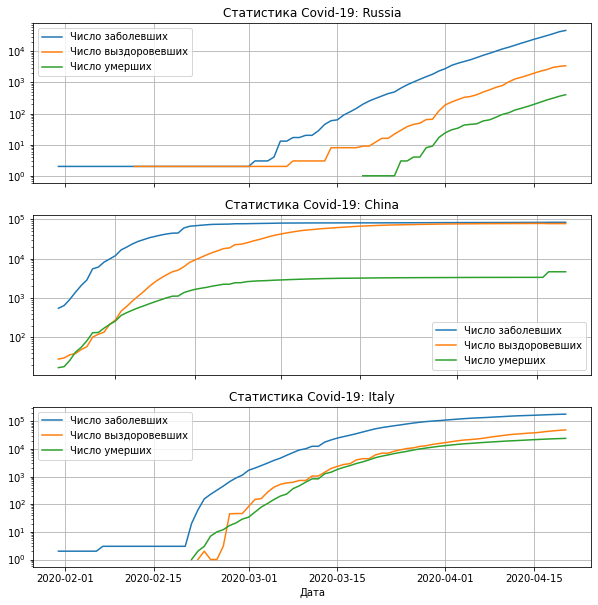

In [12]:
countries = ["Russia", "China", "Italy"]
# Создаём контейнер с тремя графиками (по числу стран)
# Аргумент figsize позволяет задать размер контейнера (в дюймах)
fig, ax = plt.subplots(len(countries), figsize=(10,10))
for i, country in enumerate(countries):
    dates_confirmed, confirmed = get_nonzero_row(aggr_data, country, "Confirmed")
    dates_recovered, recovered = get_nonzero_row(aggr_data, country, "Recovered")
    dates_deaths, deaths = get_nonzero_row(aggr_data, country, "Deaths")
    ax[i].plot(dates_confirmed, confirmed, label="Число заболевших")
    ax[i].plot(dates_recovered, recovered, label="Число выздоровевших")
    ax[i].plot(dates_deaths, deaths, label="Число умерших")
    ax[i].grid()
    ax[i].set_yscale("log") # Логарифмическая шкала
    ax[i].set_xlabel("Дата")
    ax[i].set_title(f"Статистика Covid-19: {country}")
    ax[i].legend()
    ax[i].label_outer() # Эта функция позволяет отобразить только одну ось, общую для всех графиков

Таблица reference.csv содержит основные данные по каждой стране:\
Координаты, население, название столицы и т.п.

In [13]:
ref_data = pd.read_csv("./covid-19/data/reference.csv")
ref_data = ref_data[pd.notna(ref_data['iso2'])] # Исключаем не-страны (напр., "Diamond Princess")
ref_data = ref_data[pd.isna(ref_data['Province_State'])] # Исключаем провинции

In [14]:
ref_data.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
0,4,AF,AFG,4.0,NaN,NaN,NaN,Afghanistan,33.93911,67.709953,Afghanistan,38928341.0
1,8,AL,ALB,8.0,NaN,NaN,NaN,Albania,41.15330,20.168300,Albania,2877800.0
2,12,DZ,DZA,12.0,NaN,NaN,NaN,Algeria,28.03390,1.659600,Algeria,43851043.0
3,20,AD,AND,20.0,NaN,NaN,NaN,Andorra,42.50630,1.521800,Andorra,77265.0
4,24,AO,AGO,24.0,NaN,NaN,NaN,Angola,-11.20270,17.873900,Angola,32866268.0


Построим гистограмму смертности по странам мира.\
Функция plt.hist() осуществляет отображение гистограммы

In [15]:
def get_country_info(data, country):
    lat = data[(data['Combined_Key'] == country)]["Lat"].values
    lon = data[(data['Combined_Key'] == country)]["Long_"].values
    pop = data[(data['Combined_Key'] == country)]["Population"].values
    return lat[0], lon[0], int(pop[0])

In [16]:
all_countries = ref_data["Combined_Key"].values # Названия всех стран мира
rel_deaths = []
total_deaths = 0
total_confirmed = 0
for country in all_countries:
    _, confirmed = get_nonzero_row(aggr_data, country, "Confirmed")
    _, deaths = get_nonzero_row(aggr_data, country, "Deaths")
    if len(deaths) > 0 and len(confirmed) > 0:
        current_confirmed = confirmed[-1] # Текущее значение подтверждённых случаев
        current_deaths = deaths[-1] # Текущее значение умерших
        rel_deaths.append(current_deaths / current_confirmed)
        total_deaths += current_deaths
        total_confirmed += current_confirmed
worldwide_rel_death = total_deaths / total_confirmed

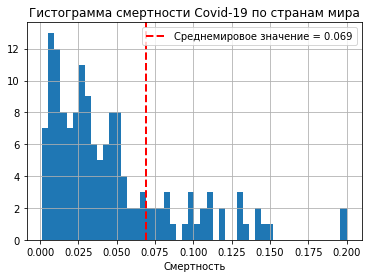

In [17]:
plt.hist(rel_deaths, bins=50) # параметр bins задаёт количество столбцов
plt.axvline(worldwide_rel_death, color='r', linestyle='dashed',
            linewidth=2, label=f"Среднемировое значение = {worldwide_rel_death:.3f}") 
plt.grid()
plt.xlabel("Смертность")
plt.title("Гистограмма смертности Covid-19 по странам мира")
plt.legend()
plt.show()

Построим круговую диаграмму заболеваемости Covid-19\
Функция plt.pie() осуществляет отображение круговой диаграммы

In [18]:
total_confirmed = 0
total_recovered = 0
total_deaths = 0
for country in all_countries:
    _, confirmed = get_nonzero_row(aggr_data, country, "Confirmed")
    _, recovered = get_nonzero_row(aggr_data, country, "Recovered")
    _, deaths = get_nonzero_row(aggr_data, country, "Deaths")
    if len(confirmed) > 0:
        total_confirmed += confirmed[-1]
    if len(recovered) > 0:
        total_recovered += recovered[-1]
    if len(deaths) > 0:
        total_deaths += deaths[-1]
total_diseased = total_confirmed - total_recovered - total_deaths

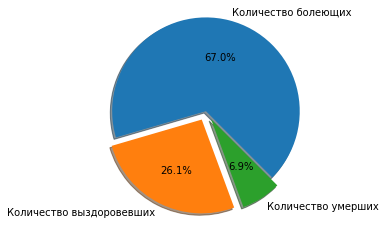

In [19]:
pie_data = [total_diseased, total_recovered, total_deaths]
explode = (0, 0.1, 0.1) # Выделение некоторых секторов
pie_labels = ["Количество болеющих", "Количество выздоровевших", "Количество умерших"]
fig, ax = plt.subplots()
ax.pie(pie_data, labels=pie_labels, autopct='%1.1f%%',
        shadow=True, startangle=-45, explode=explode)
fig.set_facecolor('white') # Цвет фона
ax.axis('equal') # Чтобы груговая диаграмма имела форму круга, а не эллипса
plt.show()

Построим столбцовую диаграмму десяти стран с максимальным\
ежедневным приростом заболеваемости.\
Функция plt.bar() позволяет строить такие диаграммы.

In [20]:
current_daily_growth = [] # Тут будем хранить пары (страна, дневной прирост)
current_mortality = [] # Тут будем хранить пары (страна, текущая смертность)
for country in all_countries:
    _, confirmed = get_nonzero_row(aggr_data, country, "Confirmed")
    _, deaths = get_nonzero_row(aggr_data, country, "Deaths")
    if len(confirmed) == 1: # Единственное значение, оно и является суточным приростом
        current_daily_growth.append((country, confirmed[0]))
    if len(confirmed) >= 2: # Вычисляем разность между текущим и предыдущим значениями
        current_daily_growth.append((country, confirmed[-1] - confirmed[-2]))
    if len(deaths) >= 1: # Вычисляем текущую смертность
        current_mortality.append((country, deaths[-1] / confirmed[-1]))

current_daily_growth_top10 = sorted(current_daily_growth,
                              key=lambda item: item[1],
                              reverse=True)[:10] # Топ 10 стран по приросту заболеваемости
top10_growth_countries = [item[0] for item in current_daily_growth_top10]
top10_growth = [item[1] for item in current_daily_growth_top10]

current_mortality_top10 = sorted(current_mortality,
                              key=lambda item: item[1],
                              reverse=True)[:10] # Топ 10 стран по смертности
top10_mortality_countries = [item[0] for item in current_mortality_top10]
top10_mortality = [item[1] for item in current_mortality_top10]

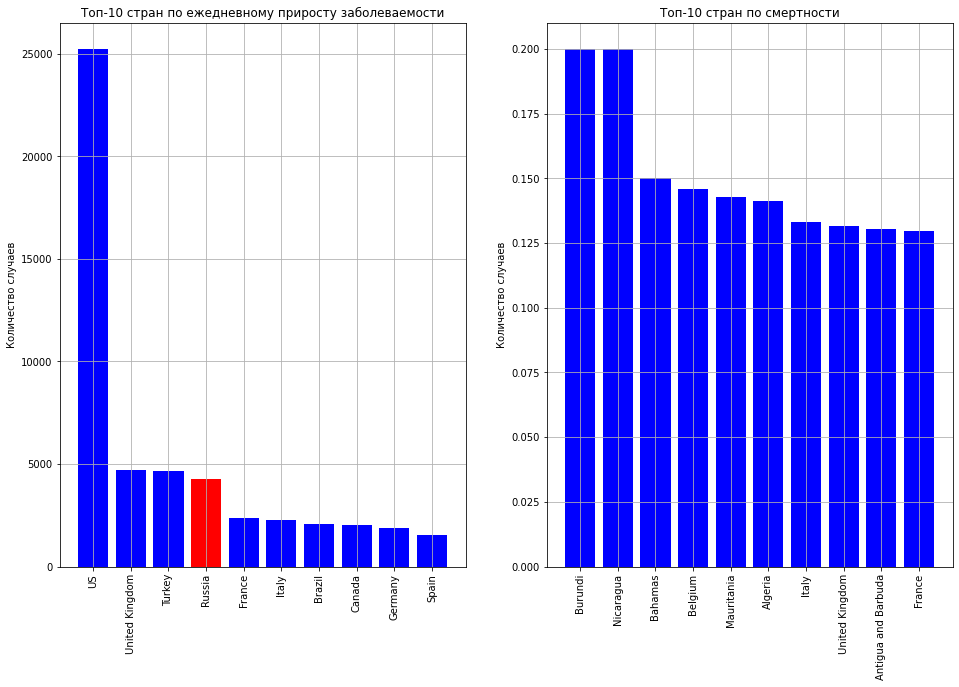

In [21]:
colors_growth = ['r' if c == "Russia" else 'b' for c  in top10_growth_countries] # Красным цветом отметим Россию
colors_mortality = ['r' if c == "Russia" else 'b' for c  in top10_mortality_countries]
fig, ax = plt.subplots(1, 2, figsize=(16, 10))
# На левом графике построим диаграмму дневного прироста заболевших
ax[0].bar(top10_growth_countries, top10_growth, color=colors_growth)
ax[0].set_xticklabels(top10_growth_countries, rotation=90) # Поворот значений по оси X
ax[0].set_ylabel("Количество случаев") # Название оси Y
ax[0].set_title("Топ-10 стран по ежедневному приросту заболеваемости")
ax[0].grid()
# На правом графике построим диаграмму текущей смертности
ax[1].bar(top10_mortality_countries, top10_mortality, color=colors_mortality)
ax[1].set_xticklabels(top10_mortality_countries, rotation=90) # Поворот значений по оси X
ax[1].set_ylabel("Количество случаев") # Название оси Y
ax[1].set_title("Топ-10 стран по смертности")
ax[1].grid()

Отобразим смертности по странам мира на карте.<br>
Для этого подключим модуль mpl_toolkits.<br>
Если при импорте возникла ошибка, установите пакет "basemap" с помощью conda.<br>
```
conda install basemap
```
Либо с помощью pip:
```
pip install --user https://github.com/matplotlib/basemap/archive/master.zip
```

Подробная документация об этом модуле доступна на сайте [https://matplotlib.org/basemap/](https://matplotlib.org/basemap/)

In [25]:
# Эту переменную окружения необходимо задать из-за бага в basemap
# Подробнее: https://github.com/matplotlib/basemap/issues/419
os.environ["PROJ_LIB"] = os.path.join(os.environ["CONDA_PREFIX"], "share", "proj")
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
from mpl_toolkits.basemap import Basemap

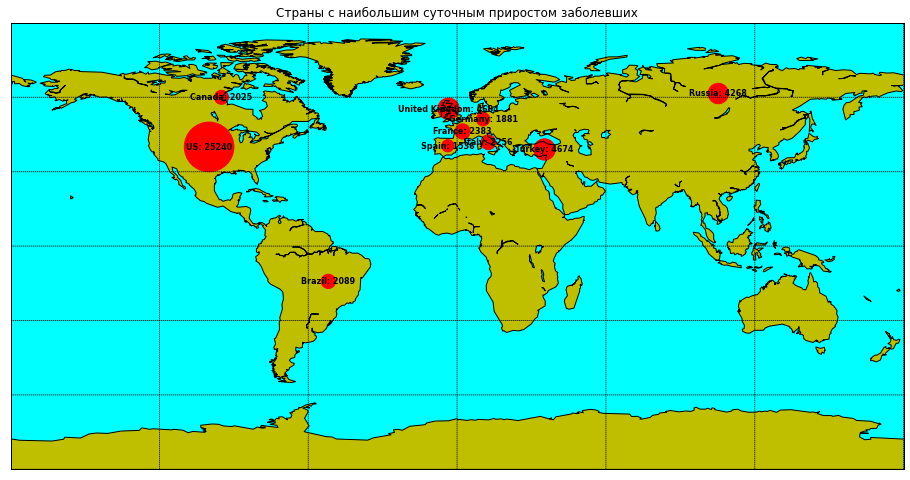

In [26]:
# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
# resolution = 'c' means use crude resolution coastlines.
fig, axes = plt.subplots(1, figsize=(16, 10))
# Создаём объект карты и привязываем его к только что созданному графику axes
m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180, urcrnrlon=180, resolution='c', ax=axes)
m.drawcoastlines() # Прорисовываем линии побережий
m.fillcontinents(color='y', lake_color='aqua') # Заливаем континенты указанными цветами
m.drawparallels(np.arange(-90.,91.,30.)) # Рисуем параллели
m.drawmeridians(np.arange(-180.,181.,60.)) # Рисуем меридианы
m.drawmapboundary(fill_color='aqua') # Рисуем границы карты и заливаем океаны указанным цветом

for country, growth in current_daily_growth_top10:
    lat, lon, pop = get_country_info(ref_data, country) # Получим широту и долготу страны
    radius = 10 * np.sqrt(growth / current_daily_growth_top10[0][1]) # Площадь круга пропорциональна приросту
    # Создаём объект круга красного цвета с аданным радиусом
    circle = plt.Circle((lon, lat), radius, color='r', fill=True)
    # Функция add_patch() позволяет нарисовать на графике объекты различной формы
    axes.add_patch(circle)
    # Функция annotate() позволяет отобразить текст в заданном месте графика
    axes.annotate(f"{country}: {growth}", xy=(lon, lat), fontsize=8,
                  verticalalignment='center', horizontalalignment='center',
                  weight='bold', color="black")

fig.set_facecolor('white') # Цвет фона
plt.title("Страны с наибольшим суточным приростом заболевших")
plt.show()

### 3D отображение (Необходимо перезапустить ядро ноутбука)

<IPython.core.display.Javascript object>


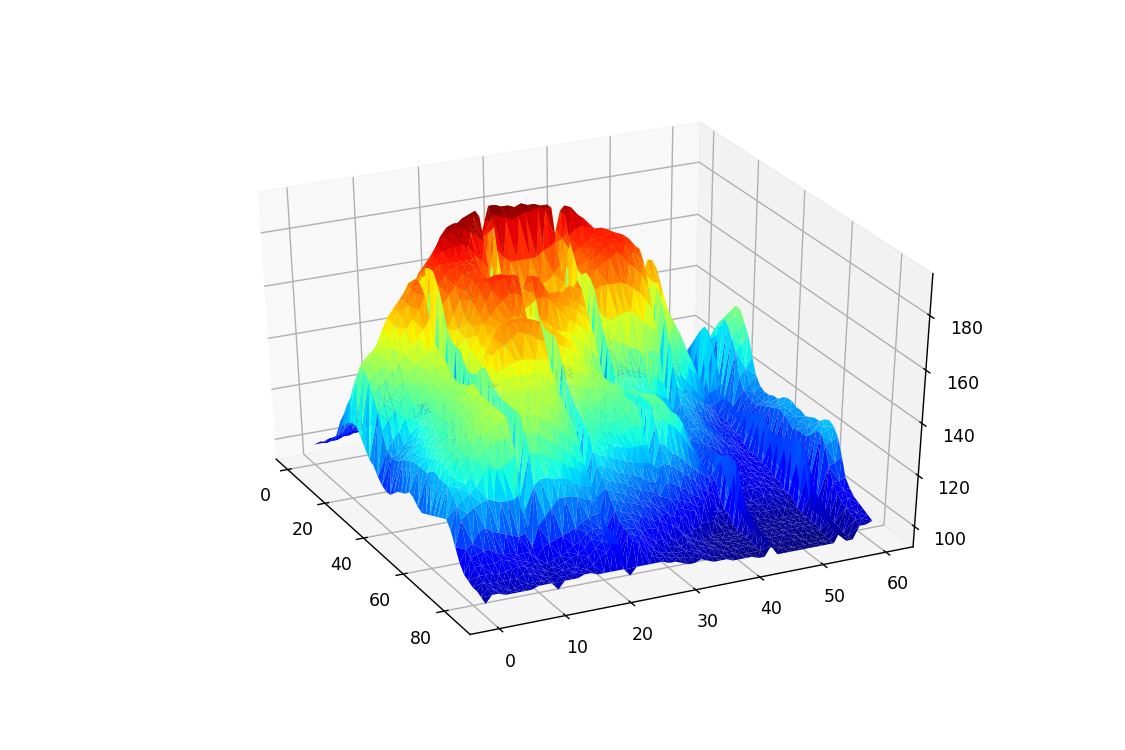

In [1]:
%matplotlib notebook
texture_level = 2

# Импортируем все необходимые библиотеки
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
 
# Получаем карту глубин для вулкана и задаем уровен детализации
url = 'https://python-graph-gallery.com/wp-content/uploads/volcano.csv'
data = pd.read_csv(url)[::texture_level]
 
# С помощью unstack преобразуем таблицу в список координат (по сути поворот таблицы)
df=data.unstack().reset_index()
df.columns=["X","Y","Z"]
 
# Categorical дает численное значение каждому уникальному объекту и делаем замену с помощью cat.codes
df['X']=pd.Categorical(df['X'])
df['X']=df['X'].cat.codes
 
# Создаем график
fig = plt.figure(figsize=(9,6))
ax = fig.gca(projection='3d')
# Отрисовываем триангулированную поверхность
ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.jet, linewidth=0.01)
#ax.scatter(df['Y'], df['X'], df['Z'], cmap=plt.cm.jet, linewidth=0.01)
plt.show()

## Bonus: визуализация данных с помощью библиотеки seaborn

Seaborn является надстройкой над библиотекой matplotlib. Позволяет рисовать больше различных графиков, а также делает их более красивыми.

### Примеры графиков

### Scatterplot Matrix

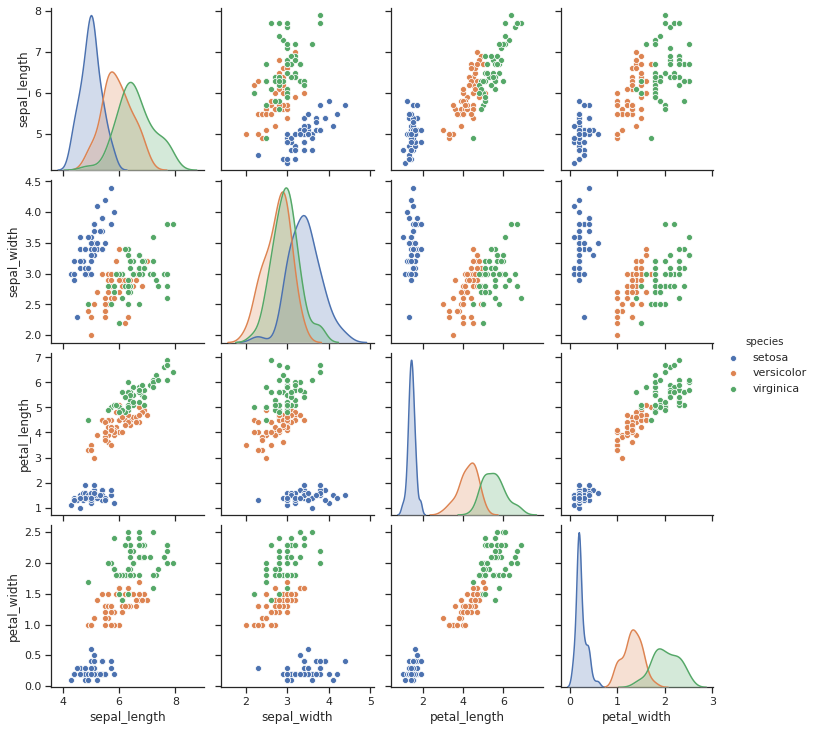

In [2]:
%matplotlib inline
import seaborn as sns
sns.set(style="ticks")

# Загружаем встроенный датасет
df = sns.load_dataset("iris")
# Отрисовываем график
sns.pairplot(df, hue="species")

### Barplot

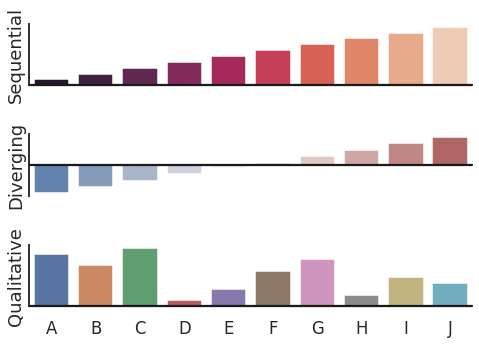

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", context="talk")
# Получаем объект для генерации рандома
rs = np.random.RandomState(8)

# Задаем параметры лэйаута для графиков
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(7, 5), sharex=True)

x = np.array(list("ABCDEFGHIJ"))
y1 = np.arange(1, 11)


sns.barplot(x=x, y=y1, palette="rocket", ax=ax1)
# axhline добавляет горизонт. линию на график
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Sequential")

# Center the data to make it diverging
y2 = y1 - 5.5
sns.barplot(x=x, y=y2, palette="vlag", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("Diverging")

# Randomly reorder the data to make it qualitative
y3 = rs.choice(y1, len(y1), replace=False)
sns.barplot(x=x, y=y3, palette="deep", ax=ax3)
ax3.axhline(0, color="k", clip_on=False)
ax3.set_ylabel("Qualitative")

# despine убирает верхнюю и правую линию на графике
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)

### KDEPlot

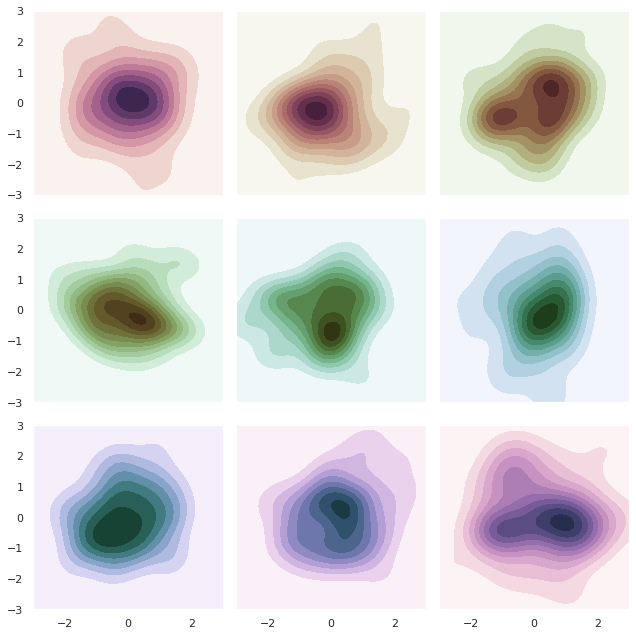

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="dark")
rs = np.random.RandomState(50)

# Set up the matplotlib figure
f, axes = plt.subplots(3, 3, figsize=(9, 9), sharex=True, sharey=True)

# Rotate the starting point around the cubehelix hue circle
for ax, s in zip(axes.flat, np.linspace(0, 3, 10)):

    # Create a cubehelix colormap to use with kdeplot
    cmap = sns.cubehelix_palette(start=s, light=1, as_cmap=True)

    # Generate and plot a random bivariate dataset
    x, y = rs.randn(2, 50)
    sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=ax)
    ax.set(xlim=(-3, 3), ylim=(-3, 3))

f.tight_layout()

### Heatmap

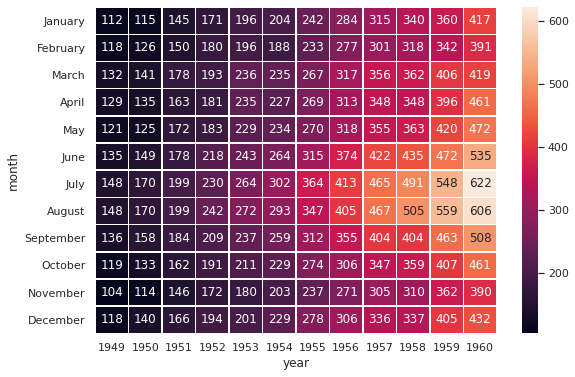

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
# Сделать красиво
sns.set()

# Load the example flights dataset and convert to long-form
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)

### Jointplot

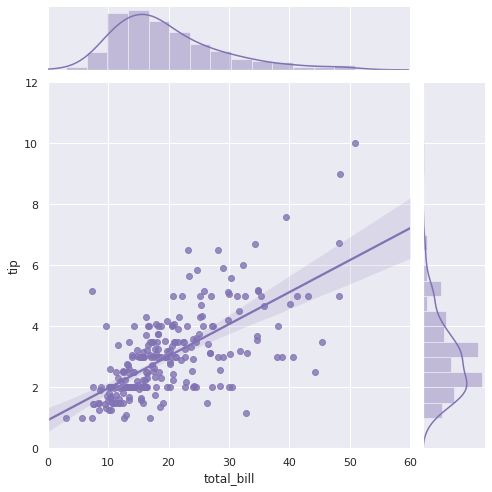

In [6]:
import seaborn as sns
sns.set(style="darkgrid")

tips = sns.load_dataset("tips")
g = sns.jointplot("total_bill", "tip", data=tips,
                  kind="reg", truncate=False,
                  xlim=(0, 60), ylim=(0, 12),
                  color="m", height=7)

### COVID-19 and Seaborn

Text(0.5, 1.0, 'Confirmed corr')

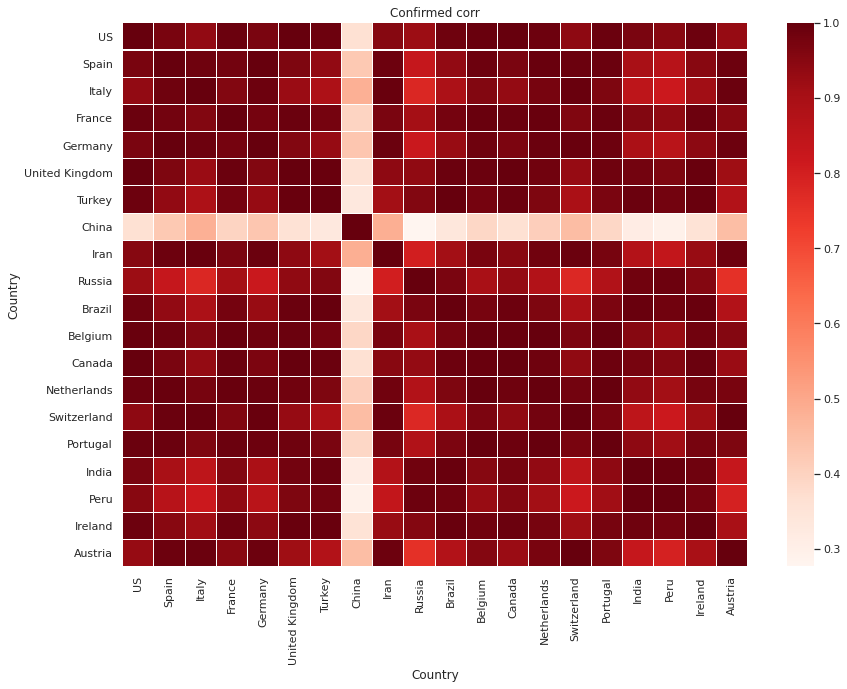

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

aggr_data = pd.read_csv("./covid-19/data/countries-aggregated.csv")

left = aggr_data.drop(['Recovered', 'Deaths'], axis=1)
left = left.pivot_table(index=['Date'], columns=['Country'])
left = left['Confirmed'].transpose()
left = pd.DataFrame.sort_values(left, by = '2020-04-20', ascending=False).transpose()

f, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(left.corr().iloc[:20,:20], annot=False, linewidths=.05, ax=ax, cbar=True, cmap="Reds").set_title("Confirmed corr")

Text(0.5, 1.0, 'Recovered corr')

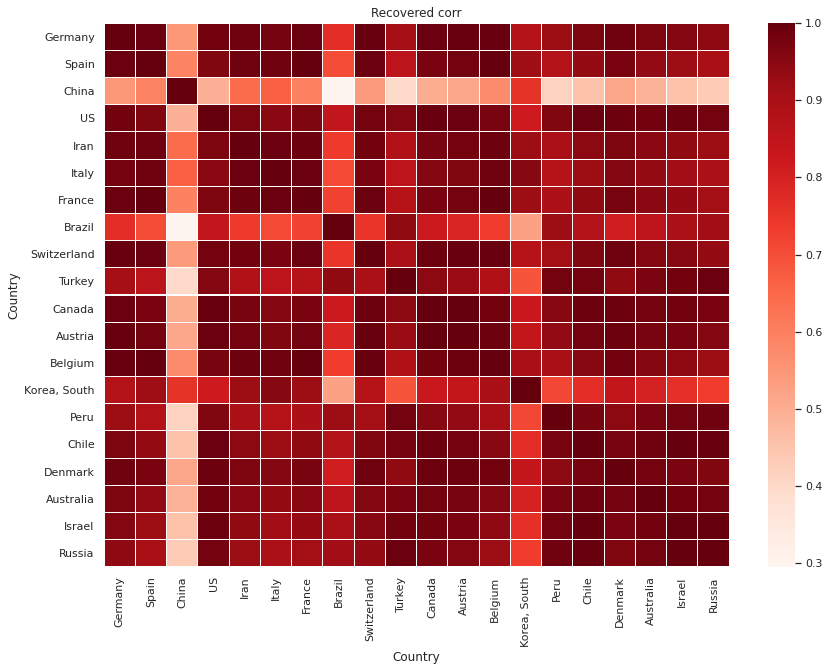

In [8]:
left = aggr_data.drop(['Confirmed', 'Deaths'], axis=1)
left = left.pivot_table(index=['Date'], columns=['Country'])
left = left['Recovered'].transpose()
left = pd.DataFrame.sort_values(left, by = '2020-04-20', ascending=False).transpose()

f, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(left.corr().iloc[:20,:20], annot=False, linewidths=.05, ax=ax, cbar=True, cmap="Reds").set_title("Recovered corr")

Text(0.5, 1.0, 'Deaths corr')

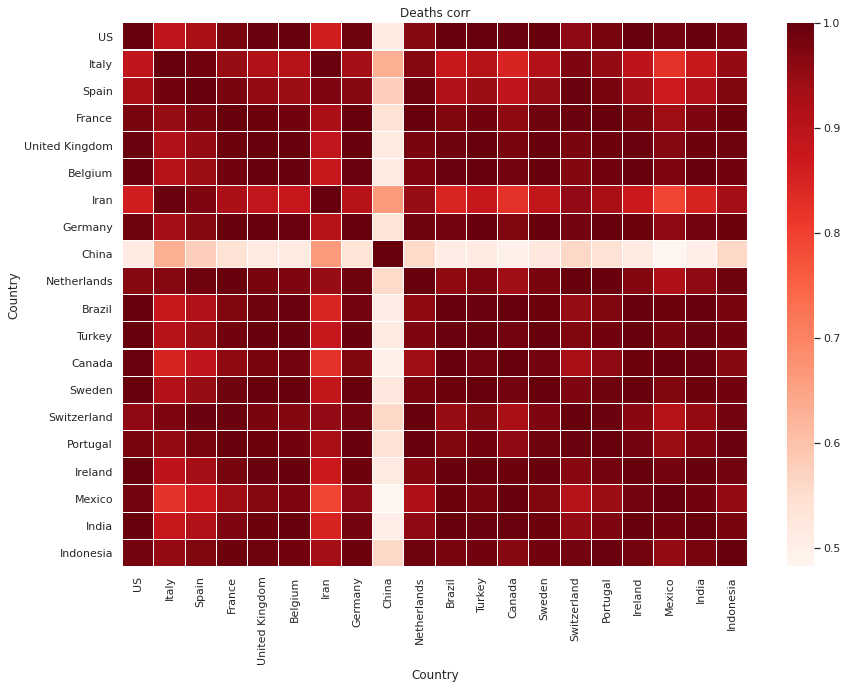

In [9]:
left = aggr_data.drop(['Confirmed', 'Recovered'], axis=1)
left = left.pivot_table(index=['Date'], columns=['Country'])
left = left['Deaths'].transpose()
left = pd.DataFrame.sort_values(left, by = '2020-04-20', ascending=False).transpose()

f, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(left.corr().iloc[:20,:20], annot=False, linewidths=.05, ax=ax, cbar=True, cmap="Reds").set_title("Deaths corr")